In [1]:
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences

In [2]:
# Load the IMDb movie review dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


((25000,), (25000,), (25000,), (25000,))

In [3]:
max_length = 500  # Pad reviews to 500 words
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

x_train.shape, x_test.shape

((25000, 500), (25000, 500))

In [ ]:
# Build the model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

model.summary()

d:\source\PyCharmProject\veunex\learning\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 256ms/step - accuracy: 0.7000 - loss: 0.5595
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 270ms/step - accuracy: 0.8712 - loss: 0.3147
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 286ms/step - accuracy: 0.9220 - loss: 0.2064


In [8]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: {}'.format(accuracy))


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8809 - loss: 0.3099
Accuracy: 0.879360020160675


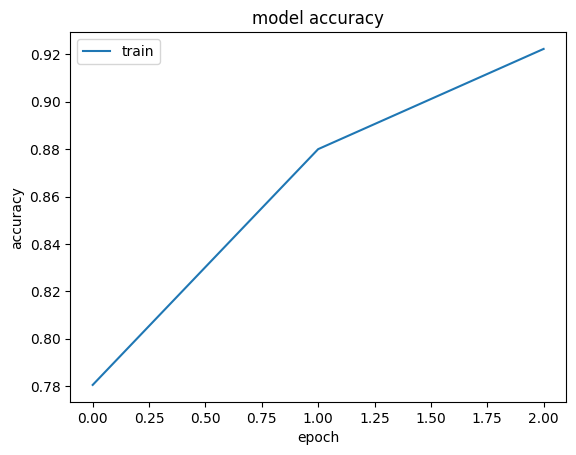

In [11]:
# plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [16]:
# predict sentiment from reviews
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

def predict_sentiment(review):
    # Encode and pad the review
    encoded_review = [word_to_id.get(word, 2) for word in review.split()]
    encoded_review = pad_sequences([encoded_review], maxlen=max_length)
    
    # Predict sentiment
    sentiment = model.predict(encoded_review)
    return sentiment[0][0]

# Test the model
reviews = ['The movie was very good and exciting',
           'The movie was not good and I did not like it',
           'The movie was terrible and bad',
           'This movie was not bad or good'
]

def get_sentiment(sentiment):
    if sentiment < 0.5:
        return 'Negative'
    elif sentiment == 0.5:
        return 'Neutral'
    else:
        return 'Positive'

for review in reviews:
    sentiment = predict_sentiment(review)
    l = get_sentiment(sentiment)
    print('Review: {}'.format(review))
    print('Sentiment: {}'.format(sentiment))
    print('Sentiment: {}'.format(l))
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Review: The movie was very good and exciting
Sentiment: 0.5607336163520813
Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Review: The movie was not good and I did not like it
Sentiment: 0.30709323287010193
Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Review: The movie was terrible and bad
Sentiment: 0.04374153912067413
Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Review: This movie was not bad or good
Sentiment: 0.16583393514156342
Sentiment: Negative

